In [9]:
for i in range(0, 52, 1):
    filename = (str(i) + ".inp")
    target = open(filename, 'w+')
    pos = 4.504 * i * (1 / 50)
    target.write("""include /home/ben/Documents/gulp_calcs/0_datafiles/na3ocl_structure.inp
""")
    target.write(f"centre cart 2.252 0 0")
    target.write("""
size 12 16
vacancy cart 4.504 0 0
vacancy cart 0 0 0
""")
    target.write(f"intersitial Cl cart {pos:.14f} 0 0 fix")
    target.write("""
include /home/ben/Documents/gulp_calcs/0_datafiles/na3ocl_khandy_potentials.inp    
""")

In [10]:
import glob
import subprocess
from tqdm import tqdm
import multiprocessing
from time import sleep
import random

def gulp(input_path):
    sleep(random.random())
    run = True
    output_path = input_path[:-3] + 'out'
    try:
        with open(output_path) as f:
            file = f.read()
        if 'Job Finished at' in file:
            run = False
    except:
        pass
    if run:
        with open(input_path) as f:
            output_path = input_path[:-3] + 'out'
            with open(output_path, 'w') as o:
                try:
                    a = subprocess.run(['gulp'], stdin = f, stdout = o, timeout=None)
                except:
                    pass

all_cases = sorted(glob.glob('*.inp'), key = lambda x: x.split('/')[-1].split('.')[0])

complete = []

for case in all_cases:
    try:
        with open(case[:-3] + 'out', 'r') as f:
            g = f.read()
        if 'Final energy' in g:
            complete.append(case)
    except:
        pass

cases = [case for case in all_cases if case not in complete]

N = len(cases)

def update():
    pbar.update(1)

if __name__ == '__main__':
    with multiprocessing.Pool() as pool:
        for result in tqdm(pool.imap_unordered(gulp, cases), total=len(cases)):
            pass
    pool.close()
    pool.join()

100%|██████████| 52/52 [01:10<00:00,  1.35s/it]


In [1]:
import re
import glob
import numpy as np

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])
        else:
            continue
    
def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies

energy = energyList('*.out')
energies = []

for i in range(0, 51):
        try:
            energies.append(energy[f'{i}.out'])
        except:
            pass

print(energies)

{'37.out': 5.65822306, '51.out': None, '13.out': 5.74674005, '35.out': 5.82473807, '1.out': 5.19306232, '38.out': 5.58181951, '17.out': 6.09585143, '32.out': 6.08841136, '16.out': 6.00860557, '7.out': 5.3438679, '41.out': 5.39015871, '28.out': 6.38205013, '2.out': 5.19958022, '50.out': 5.20613879, '4.out': 5.23540608, '39.out': 5.51121903, '46.out': 5.21288909, '12.out': 5.66490159, '8.out': 5.39443137, '20.out': 6.32741983, '47.out': 5.19939379, '5.out': 5.26429957, '15.out': 5.92006777, '30.out': 6.25111427, '11.out': 5.58797976, '45.out': 5.23383786, '3.out': 5.21378236, '18.out': 6.17960836, '43.out': 5.29749868, '26.out': 6.46326018, '29.out': 6.32172383, '0.out': 5.19448686, '36.out': 5.73963282, '6.out': 5.30041732, '25.out': 6.48069396, '34.out': 5.9124717, '22.out': 6.43330385, '31.out': 6.17253822, '42.out': 5.34027128, '9.out': 5.45215775, '14.out': 5.83215874, '48.out': 5.19359872, '23.out': 6.46543271, '40.out': 5.44722171, '21.out': 6.38674724, '49.out': 5.19576738, '33.o

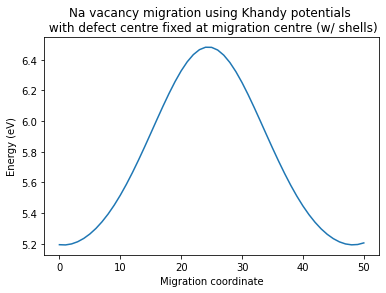

In [12]:
import matplotlib.pyplot as plt

x = list(range(0,51))
y = []


for i in range(0, 51):
    try:
        y.append(energy[f'{i}.out'])
    except:
        pass
    
plt.plot(x, y)
plt.xlabel('Migration coordinate')
plt.ylabel('Energy (eV)')
plt.title('Na vacancy migration using Khandy potentials \n with defect centre fixed at migration centre (w/ shells)')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/khandy_cl_migration_fixcent.jpg', bbox_inches='tight', dpi=500)